In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df= pd.read_csv('Salary_Data.csv')

In [3]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [120]:
# Separate the input and output variable
x=df[['Salary']] # input data should be two diamension
y=df['YearsExperience']

In [121]:
x.shape

(30, 1)

In [122]:
y.shape

(30,)

In [123]:
# corelation factor shows hihly related to each other.
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


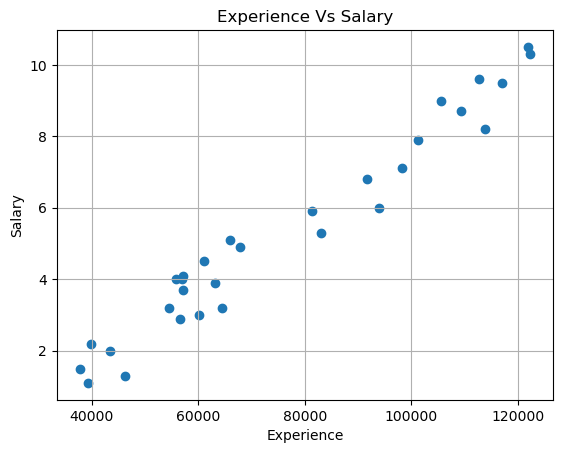

In [124]:
plt.grid()
plt.title('Experience Vs Salary')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.scatter(x,y)

In [125]:
# import the function
from sklearn.model_selection import train_test_split

In [126]:
# split the data in training (75%) and testing (25%)
x_train,x_text,y_train,y_test=train_test_split(x,y,random_state=0) # interchage the value of x and y

In [127]:
x_train.size

22

In [128]:
x_text.size

8

In [129]:
from sklearn.linear_model import LinearRegression

In [130]:
regressor=LinearRegression()

In [131]:
regressor.fit(x_train,y_train)

LinearRegression()

In [132]:
m=regressor.coef_

In [133]:
c=regressor.intercept_

In [134]:
m

array([0.00010017])

In [135]:
c

-2.4069397347271453

In [136]:
y=m*12+c

In [137]:
y

array([-2.40573773])

In [138]:
regressor.predict([[12]])

C:\Users\rajesh\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-2.40573773])

In [139]:
# Validation or Check acquirecy
# predic on data set

In [140]:
y_pred=regressor.predict(x_text)

In [141]:
y_pred

array([1.372477  , 9.85265035, 3.31071648, 3.9254439 , 9.30954262,
       8.55448065, 8.87541705, 3.18180101])

In [142]:
y_test

2      1.5
28    10.3
13     4.1
10     3.9
26     9.5
24     8.7
27     9.6
11     4.0
Name: YearsExperience, dtype: float64

In [143]:
y_pred-y_test

2    -0.127523
28   -0.447350
13   -0.789284
10    0.025444
26   -0.190457
24   -0.145519
27   -0.724583
11   -0.818199
Name: YearsExperience, dtype: float64

In [144]:
result=pd.DataFrame({
    'actual':y_test,
    'Prediction':y_pred
})

In [145]:
type(y_pred)

numpy.ndarray

In [146]:
result=pd.DataFrame({
    'x':x_text['YearsExperience'],
    'y':y_test,
    'y^':y_pred,
    'Error':y_pred - y_test,
    'abs(error)':abs(y_pred-y_test)
})

KeyError: 'YearsExperience'

In [ ]:
result

In [95]:
np.mean(abs(y_pred-y_test))

3508.5455930660555

In [96]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

3508.5455930660555

In [116]:
result=pd.DataFrame({
    'x':x_text['YearsExperience'],
    'y':y_test,
    'y^':y_pred,
    'Error':y_pred - y_test,
    'Error^^2':(y_pred-y_test)**2
})

In [117]:
result

,x,y,y^,Error,Error^^2
2,1.5,37731.0,41056.257055,3325.257055,1.105733e+07
28,10.3,122391.0,123597.709384,1206.709384,1.456148e+06
13,4.1,57081.0,65443.504334,8362.504334,6.993148e+07
10,3.9,63218.0,63567.562235,349.562235,1.221938e+05
26,9.5,116969.0,116093.940990,-875.059010,7.657283e+05
24,8.7,109431.0,108590.172597,-840.827403,7.069907e+05
27,9.6,112635.0,117031.912039,4396.912039,1.933284e+07
11,4.0,55794.0,64505.533285,8711.533285,7.589081e+07


In [118]:
np.sqrt(np.mean((y_pred-y_test)**2))

4733.70258289858

In [119]:
from sklearn.metrics import mean_absolute_error
np.sqrt(mean_absolute_error(y_test,y_pred))

59.232977242968765